In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'../DATA/train.csv')
test_data = pd.read_csv(r'../DATA/test.csv')
submission_data = pd.read_csv(r'../DATA/sample_submission.csv')

# Feature engineering

In [4]:
train_data.Age.unique()

array(['20-25', '15-20', '45 and above', '30-35', '35-44', '25-30', nan,
       'Less than 20', '30-25', '30-40', 'Less than 20-25'], dtype=object)

In [5]:
test_data.Age.unique()

array(['20-25', 'Less than 20', '35-44', 'Less than 20-25', '30-30',
       'Less than 20)', '30-35', '25-25', '50-60', '22-25', nan, '20',
       '30-40', '45-49'], dtype=object)

In [6]:
test_data.Exercise_Benefit.unique()

array(['Somewhat', 'Not at All', 'Yes Significantly', 'Not Much', nan],
      dtype=object)

In [7]:
train_data.Age = train_data.Age.replace({'15-20': 'Less than 20',
                                         'Less than 20-25': 'Less than 20',
                                         '30-25': '25-30',
                                         '30-40': '35-44'})
test_data.Age = test_data.Age.replace({'Less than 20-25': 'Less than 20',
                                       'Less than 20)': 'Less than 20',
                                       '20': '20-25', '22-25': '20-25',
                                       '25-25': '25-30', '30-30': '30-35',
                                       '30-40': '35-44', '45-49': '45 and above', 
                                       '50-60': '45 and above'})
train_data.Conception_Difficulty = train_data.Conception_Difficulty.replace({'Yes, diagnosed by a doctor': 'Yes',
                                                                             'No, Yes, not diagnosed by a doctor': 'Somewhat'})
train_data.Hormonal_Imbalance = train_data.Hormonal_Imbalance.replace(['No, Yes, not diagnosed by a doctor', 'Yes Significantly'], 
                                                                      ['No', 'Yes'])
train_data.Hirsutism = train_data.Hirsutism.replace('No, Yes, not diagnosed by a doctor', 'No')
train_data.Insulin_Resistance = train_data.Insulin_Resistance.replace('No, Yes, not diagnosed by a doctor', 'No')
test_data.Insulin_Resistance = test_data.Insulin_Resistance.replace('Yes Significantly', 'Yes')
train_data.Exercise_Frequency = train_data.Exercise_Frequency.replace('Less than usual', 'Less than 6 hours')
test_data.Exercise_Frequency = test_data.Exercise_Frequency.replace({'1/2 Times a Week': '1-2 Times a Week',
                                                                     'Somewhat': 'Rarely', 'Daily': '6-8 hours',
                                                                     '30-35': 'Rarely' , 'Less than 6-8 Times a Week': '3-4 Times a Week'})
train_data.Exercise_Type = train_data.Exercise_Type.replace({'Cardio (e.g., running, cycling, swimming)': 'Cardio',
                                                             'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises)': 'Cardio',
                                                             'Flexibility and balance (e.g., yoga, pilates)': 'Flexibility and balance',
                                                             'High-intensity interval training (HIIT)': 'Strength training',
                                                             'Cardio (e.g., running, cycling, swimming), Flexibility and balance (e.g., yoga, pilates)': 'Cardio',
                                                             'Cardio (e.g., running, cycling, swimming), Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)': 'Cardio',
                                                             'Strength training (e.g., weightlifting, resistance exercises), Flexibility and balance (e.g., yoga, pilates)': 'Strength training',
                                                             'Strength training (e.g., weightlifting, resistance exercises)': 'Strength training', 
                                                             'Flexibility and balance (e.g., yoga, pilates), None': 'Flexibility and balance',
                                                             'Strength training (e.g.': 'Strength training', 'Somewhat': 'No Exercise', 'Flexibility and balance (e.g.': 'Flexibility and balance',
                                                             'Cardio (e.g., running, cycling, swimming), None': 'Cardio', 'Cardio (e.g.':  'Cardio'})
test_data.Exercise_Type = test_data.Exercise_Type.replace({'Cardio (e.g.': 'Cardio',
                                                           'Strength training (e.g.': 'Strength training',
                                                           'Yes Significantly': 'Flexibility and balance',
                                                           'Flexibility and balance (e.g.': 'Flexibility and balance',
                                                           'No': 'No Exercise', 'Sleep_Benefit': 'No Exercise', 
                                                           'Not Applicable': 'No Exercise', 'Somewhat': 'Flexibility and balance',
                                                           'Strength (e.g.': 'Strength training'})
train_data.Exercise_Duration = train_data.Exercise_Duration.replace({'30 minutes to 1 hour': '45 minutes',
                                                                     '20 minutes': 'Less than 30 minutes',
                                                                     'More than 30 minutes': '45 minutes'})
test_data.Exercise_Duration = test_data.Exercise_Duration.replace({'40 minutes': '45 minutes',
                                                                   'Not Much': 'Not Applicable',
                                                                   '20 minutes': 'Less than 30 minutes',
                                                                   '6-8 hours': 'Less than 6 hours',
                                                                   '30 minutes to 1 hour': '45 minutes',
                                                                   'Less than 20 minutes': 'Less than 30 minutes',
                                                                   '1-2 Times a Week': 'Not Applicable',
                                                                   '3-4 Times a Week': 'Less than 6 hours'})
train_data.Sleep_Hours = train_data.Sleep_Hours.replace({'More than 12 hours': '9-12 hours',
                                                         '3-4 hours': 'Less than 6 hours'})
test_data.Sleep_Hours = test_data.Sleep_Hours.replace({'6-8 Times a Week': '6-8 hours',
                                                       '3-4 hours': 'Less than 6 hours',
                                                       '6-12 hours': '9-12 hours',
                                                       '20 minutes': 'Less than 6 hours'})

In [8]:
train_data.Exercise_Benefit.value_counts()

Exercise_Benefit
Somewhat             137
Not at All            26
Yes Significantly     25
Not Much              21
Name: count, dtype: int64

In [9]:
df = train_data.copy()
df = df.set_index('ID')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    209 non-null    object 
 1   Weight_kg              208 non-null    float64
 2   PCOS                   210 non-null    object 
 3   Hormonal_Imbalance     208 non-null    object 
 4   Hyperandrogenism       207 non-null    object 
 5   Hirsutism              205 non-null    object 
 6   Conception_Difficulty  209 non-null    object 
 7   Insulin_Resistance     209 non-null    object 
 8   Exercise_Frequency     208 non-null    object 
 9   Exercise_Type          208 non-null    object 
 10  Exercise_Duration      208 non-null    object 
 11  Sleep_Hours            208 non-null    object 
 12  Exercise_Benefit       209 non-null    object 
dtypes: float64(1), object(12)
memory usage: 23.0+ KB


In [11]:
df.isnull().any(axis=1).sum()

23

In [12]:
df.isnull().sum()

Age                      1
Weight_kg                2
PCOS                     0
Hormonal_Imbalance       2
Hyperandrogenism         3
Hirsutism                5
Conception_Difficulty    1
Insulin_Resistance       1
Exercise_Frequency       2
Exercise_Type            2
Exercise_Duration        2
Sleep_Hours              2
Exercise_Benefit         1
dtype: int64

In [13]:
#df['Age'] = df['Age'].fillna(df['Age'].value_counts()[0])
df = df.fillna(df.mode().iloc[0])

In [14]:
X = df.drop('PCOS', axis=1)
y = df[['PCOS']]

In [15]:
y = y.PCOS.map({'No': 0, 'Yes': 1})

In [16]:
X = pd.get_dummies(X, drop_first=True, dtype=int)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Choice model

In [39]:
def choice_model(ml_model):
    model = ml_model
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'''accuracy_score: {accuracy_score(y_test, pred)} 
            \nclassification_report: {classification_report(y_test, pred)}
            \nconfusion_matrix: {ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)}''')
  

accuracy_score: 0.7857142857142857 
            
classification_report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.50      0.33      0.40         9

    accuracy                           0.79        42
   macro avg       0.67      0.62      0.63        42
weighted avg       0.76      0.79      0.77        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183BC0BCE0>


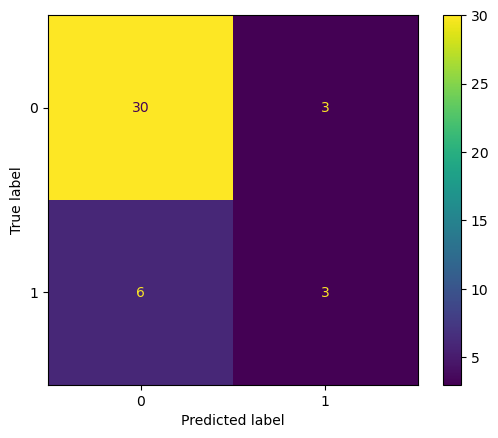

In [41]:
choice_model(LogisticRegression(max_iter=1000))

accuracy_score: 0.7857142857142857 
            
classification_report:               precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       0.00      0.00      0.00         9

    accuracy                           0.79        42
   macro avg       0.39      0.50      0.44        42
weighted avg       0.62      0.79      0.69        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183BDB3E60>


C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


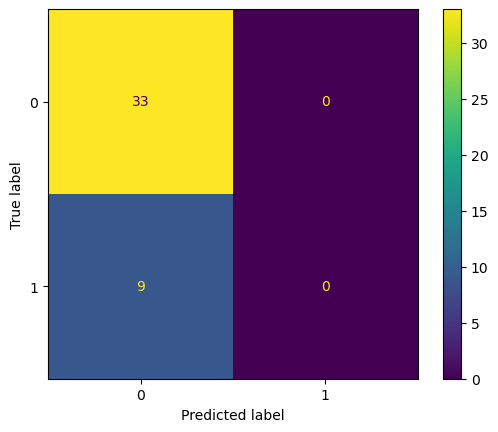

In [43]:
choice_model(SVC())

accuracy_score: 0.7857142857142857 
            
classification_report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.50      0.33      0.40         9

    accuracy                           0.79        42
   macro avg       0.67      0.62      0.63        42
weighted avg       0.76      0.79      0.77        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183C887020>


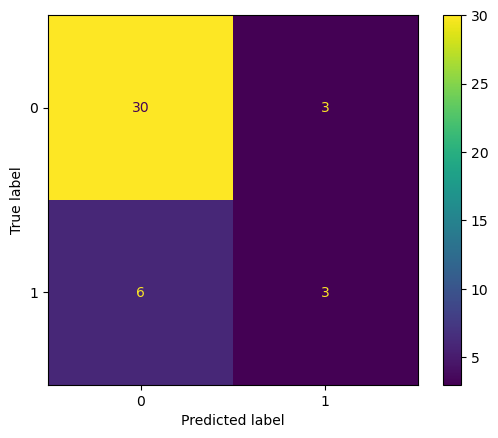

In [45]:
choice_model(DecisionTreeClassifier())

accuracy_score: 0.8333333333333334 
            
classification_report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.67      0.44      0.53         9

    accuracy                           0.83        42
   macro avg       0.76      0.69      0.72        42
weighted avg       0.82      0.83      0.82        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183C6DFC80>


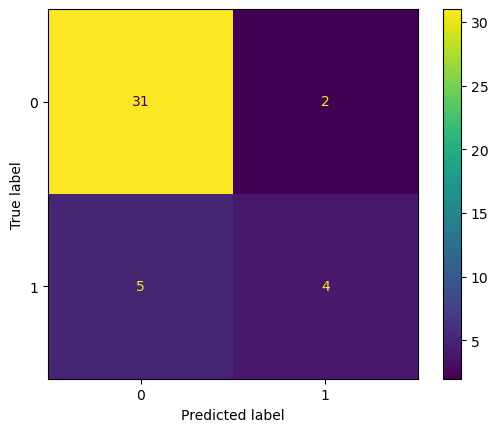

In [47]:
choice_model(RandomForestClassifier())

accuracy_score: 0.8333333333333334 
            
classification_report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.67      0.44      0.53         9

    accuracy                           0.83        42
   macro avg       0.76      0.69      0.72        42
weighted avg       0.82      0.83      0.82        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183CABB5F0>


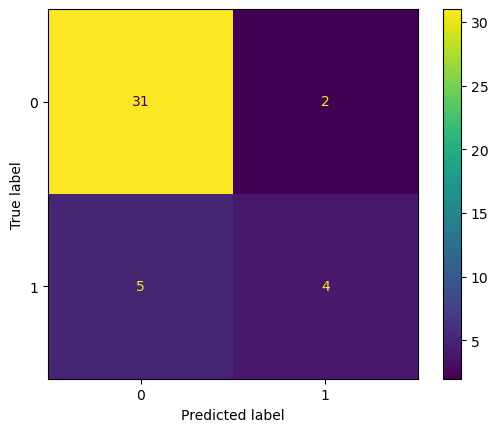

In [49]:
choice_model(GradientBoostingClassifier())

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score: 0.7619047619047619 
            
classification_report:               precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.40      0.22      0.29         9

    accuracy                           0.76        42
   macro avg       0.61      0.57      0.57        42
weighted avg       0.72      0.76      0.73        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183CA607A0>


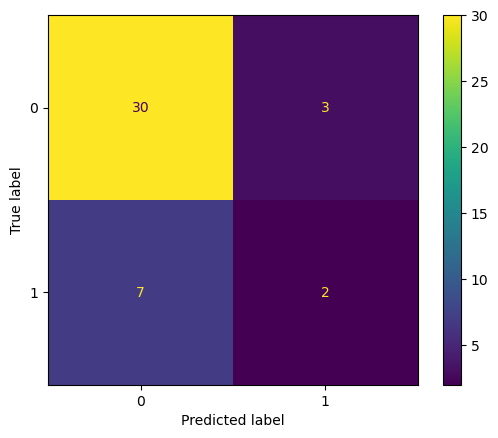

In [51]:
choice_model(AdaBoostClassifier())

accuracy_score: 0.7619047619047619 
            
classification_report:               precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.33      0.11      0.17         9

    accuracy                           0.76        42
   macro avg       0.56      0.53      0.51        42
weighted avg       0.70      0.76      0.71        42

            
confusion_matrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000002183CABB230>


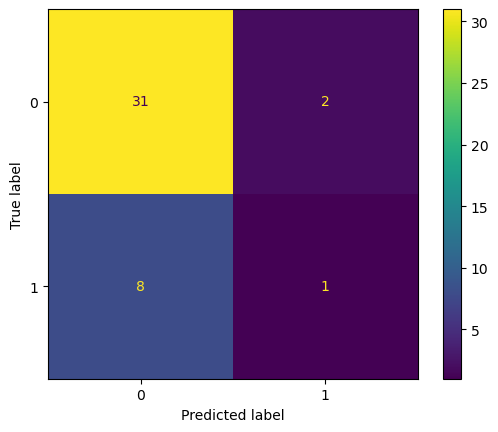

In [53]:
choice_model(KNeighborsClassifier())

# Improve model

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [58]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
parameters = {'n_estimators': np.arange(50, 70),
              'max_features': np.arange(5, 10)}

In [132]:
grid_model = GridSearchCV(RandomForestClassifier(), parameters)

In [134]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': array([5, 6, 7, 8, 9]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69])})

In [135]:
grid_model.best_params_

{'max_features': 6, 'n_estimators': 56}

In [136]:
y_pred = grid_model.predict(X_test)

In [137]:
accuracy_score(y_test, y_pred)

0.8571428571428571

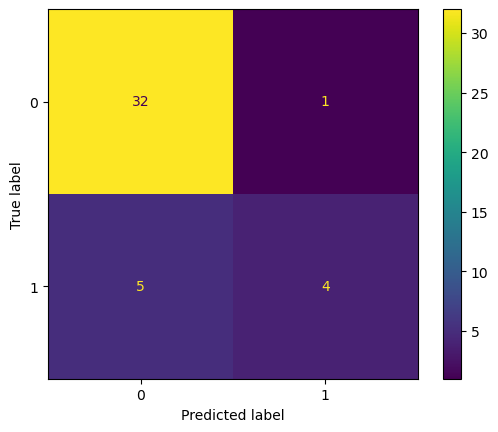

In [138]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

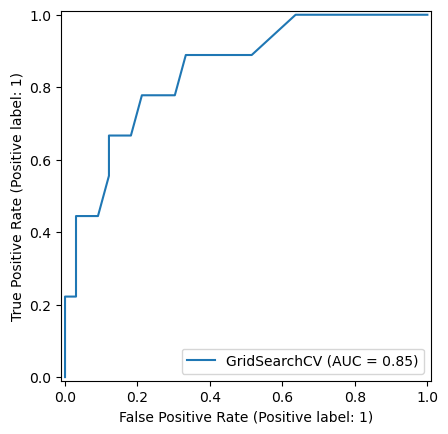

In [139]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

# Final_model

In [146]:
Final_train = train_data.copy()
Final_X = Final_train.drop('PCOS', axis=1)
Final_y = Final_train['PCOS']
Final_y = Final_y.map({'Yes': 1, 'No': 0})

In [148]:
from sklearn.base import BaseEstimator, TransformerMixin

In [150]:
class NewGenerator(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed = X_transformed.set_index('ID')
        X_transformed = X_transformed.fillna(X_transformed.mode().iloc[0])
        X_transformed = pd.get_dummies(X_transformed, drop_first=True, dtype=int)
        return X_transformed

In [152]:
final_model = Pipeline([('NewGenerator', NewGenerator()),
                        ('model_forest', RandomForestClassifier(max_features=6, 
                                                                n_estimators=56))])

In [154]:
final_model.fit(Final_X, Final_y)

Pipeline(steps=[('NewGenerator', NewGenerator()),
                ('model_forest',
                 RandomForestClassifier(max_features=6, n_estimators=56))])

In [156]:
final_model.get_params()

{'memory': None,
 'steps': [('NewGenerator', NewGenerator()),
  ('model_forest', RandomForestClassifier(max_features=6, n_estimators=56))],
 'verbose': False,
 'NewGenerator': NewGenerator(),
 'model_forest': RandomForestClassifier(max_features=6, n_estimators=56),
 'model_forest__bootstrap': True,
 'model_forest__ccp_alpha': 0.0,
 'model_forest__class_weight': None,
 'model_forest__criterion': 'gini',
 'model_forest__max_depth': None,
 'model_forest__max_features': 6,
 'model_forest__max_leaf_nodes': None,
 'model_forest__max_samples': None,
 'model_forest__min_impurity_decrease': 0.0,
 'model_forest__min_samples_leaf': 1,
 'model_forest__min_samples_split': 2,
 'model_forest__min_weight_fraction_leaf': 0.0,
 'model_forest__monotonic_cst': None,
 'model_forest__n_estimators': 56,
 'model_forest__n_jobs': None,
 'model_forest__oob_score': False,
 'model_forest__random_state': None,
 'model_forest__verbose': 0,
 'model_forest__warm_start': False}

In [158]:
from joblib import dump

In [160]:
dump(final_model, 'Exploring_Predictive_Health_Factors.joblib')

['Exploring_Predictive_Health_Factors.joblib']

In [178]:
values = pd.DataFrame(final_model.predict(test_data))

In [198]:
id_v = pd.DataFrame(test_data.ID)
solution = pd.concat([id_v, values], axis=1)
solution.columns = ['ID', "PCOS"]

In [200]:
solution.to_csv('Exploring_Predictive_Health_Factors.csv', index=False)